## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

study_results['Mouse ID'].unique()

array(['b128', 'f932', 'g107', 'a457', 'c819', 'h246', 'p189', 'n923',
       'q119', 'f993', 'z234', 'b559', 'y260', 'x930', 'o725', 'z969',
       'v835', 'r604', 'n304', 'l700', 'x336', 'l725', 'm133', 'v295',
       'a818', 'y601', 't724', 'k382', 'w422', 'c326', 'c139', 'v339',
       'a577', 'y163', 'k483', 'k804', 'o809', 'z581', 'a251', 'i386',
       'c580', 'q132', 'u327', 'v603', 'f278', 'g497', 'd474', 'o973',
       'c832', 'o331', 'm650', 'v289', 'm550', 'h428', 'r701', 'v199',
       'x264', 'f234', 'c458', 'q610', 'j913', 'a411', 'a444', 'd251',
       'j989', 'y449', 'k403', 'c758', 'x402', 'r811', 'a644', 'i177',
       'g791', 'a520', 'u196', 'm546', 'w678', 'n364', 's508', 'e662',
       'z578', 'r921', 'a492', 'w540', 'v764', 'z795', 'e291', 'e584',
       'e213', 'j755', 's565', 'a366', 'p387', 'b879', 'i901', 'k862',
       'g867', 's619', 'w697', 'j984', 'c402', 'h333', 'k510', 'p981',
       't451', 'a963', 'm269', 'g989', 'z314', 'o848', 'v719', 'q597',
      

In [60]:
# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")


# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
mouse_number = len(combined_data['Mouse ID'].unique())
mouse_number

249

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mice = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
duplicate_check = combined_data.loc[combined_data['Mouse ID'] == 'g989']
duplicate_check

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_combined_data = combined_data.drop_duplicates(['Mouse ID', 'Timepoint'])
new_combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
new_num_mice = len(new_combined_data['Mouse ID'].unique())
new_num_mice

249

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
regimen_analysis = new_combined_data.groupby("Drug Regimen")
mean_regimen = regimen_analysis['Tumor Volume (mm3)'].mean()
median_regimen = regimen_analysis['Tumor Volume (mm3)'].median()
variance_regimen = regimen_analysis['Tumor Volume (mm3)'].var()
std_regimen = regimen_analysis['Tumor Volume (mm3)'].std()
sem_regimen = regimen_analysis['Tumor Volume (mm3)'].sem()

In [10]:
regimen_df = pd.DataFrame({"Mean": mean_regimen,
                           "Median": median_regimen,
                           " Variance": variance_regimen,
                           "Standard Deviation": std_regimen,
                           "SEM": sem_regimen})
regimen_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_regimen_analysis = new_combined_data.groupby("Drug Regimen").aggregate({"Tumor Volume (mm3)": ["mean","median", "var", "std", "sem"]})
agg_regimen_analysis

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [109]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
pd_regimen = new_combined_data[['Drug Regimen', 'Mouse ID']]
new_pd_regimen = pd_regimen.groupby('Drug Regimen')
new_pd_regimen.count()

,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,156
Ramicane,228
Stelasyn,181


In [110]:
plot_new_regimen = (new_pd_regimen.count())

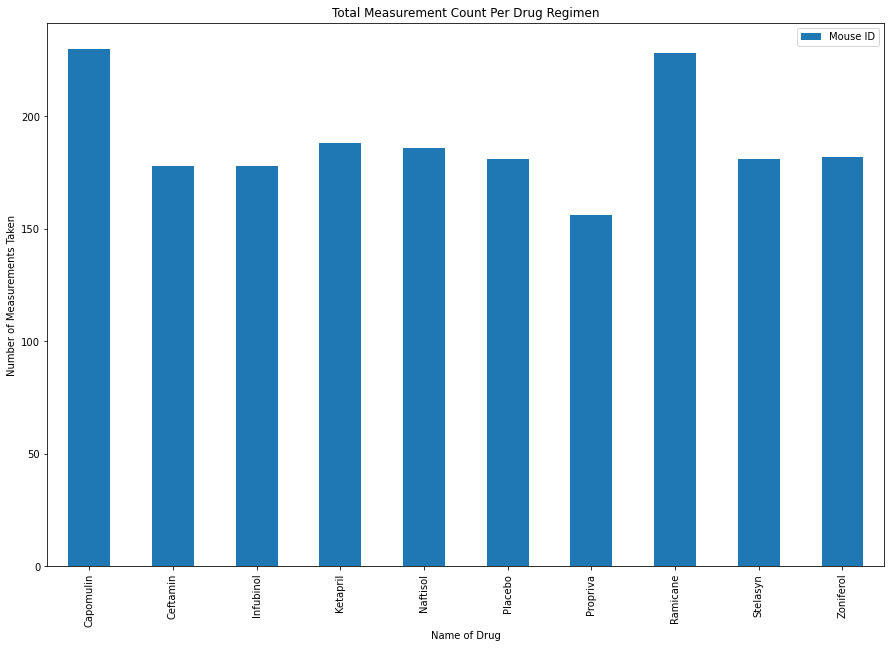

<Figure size 432x288 with 0 Axes>

In [111]:
plot_new_regimen = plot_new_regimen.plot(kind='bar', figsize=(15,10))

plt.title('Total Measurement Count Per Drug Regimen')
plt.ylabel('Number of Measurements Taken')
plt.xlabel('Name of Drug')

plt.show()
plt.tight_layout()

In [98]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(new_pd_regimen))
store = new_pd_regimen['Mouse ID'].count()
store

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

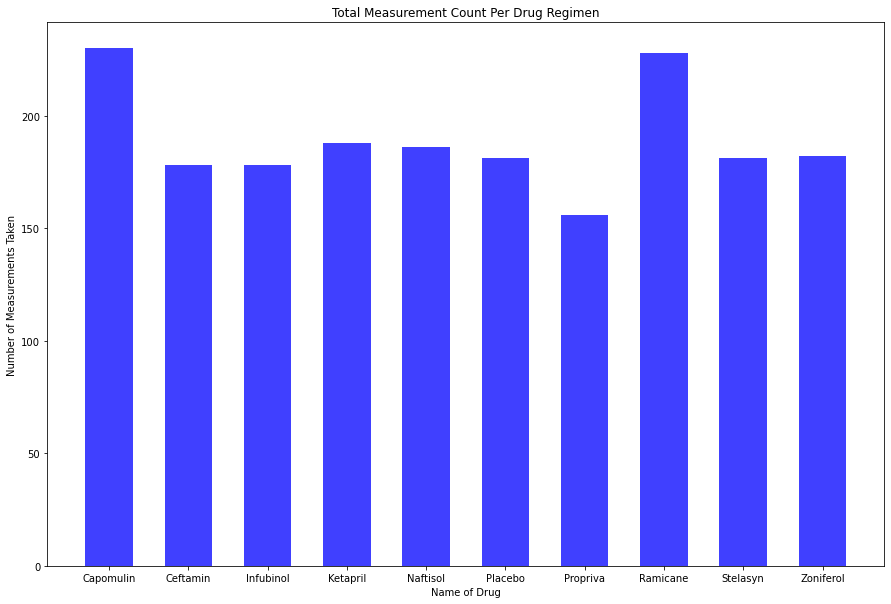

In [113]:
plt.figure(figsize=(15,10))
plt.bar(x_axis, store, color='blue', alpha=0.75, align='center', width = .6)
tick_locations=[value for value in x_axis]
drugs =['Capomulin', 'Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn', 'Zoniferol']
plt.title('Total Measurement Count Per Drug Regimen')
plt.ylabel('Number of Measurements Taken')
plt.xlabel('Name of Drug')
plt.xticks(tick_locations, drugs)
plt.show()

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_count = new_combined_data['Sex'].value_counts()

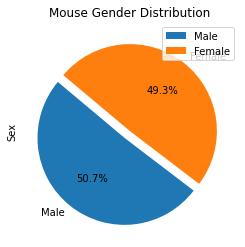

In [117]:
pie_mouse = mouse_count.plot(kind='pie',title='Mouse Gender Distribution', autopct="%1.1f%%", 
                             startangle=140, explode = (0.1,0))
pie_mouse.legend()

In [106]:
mouse_labels = ('Male', 'Female')
colors = ('blue', 'orange')
explode =(0.1,0)

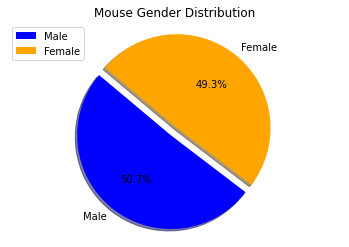

In [114]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_count, explode=explode, labels = mouse_labels, colors = colors,
       autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis('equal')
plt.title('Mouse Gender Distribution')
plt.legend()
plt.show()

## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
rami_combined_data = combined_data.loc[combined_data['Drug Regimen'] == 'Ramicane']
capo_combined_data = combined_data.loc[combined_data['Drug Regimen'] == 'Capomulin']
infu_combined_data = combined_data.loc[combined_data['Drug Regimen'] == 'Infubinol']
ceft_combined_data = combined_data.loc[combined_data['Drug Regimen'] == 'Ceftamin']


new_rami_combined = rami_combined_data[['Mouse ID', 'Timepoint']]
new_capo_combined = capo_combined_data[['Mouse ID', 'Timepoint']]
new_infu_combined = infu_combined_data[['Mouse ID', 'Timepoint']]
new_ceft_combined = ceft_combined_data[['Mouse ID', 'Timepoint']]

upd_rami_combined = rami_combined_data[['Mouse ID',  'Timepoint', 'Tumor Volume (mm3)']]
upd_capo_combined = capo_combined_data[['Mouse ID',  'Timepoint','Tumor Volume (mm3)']]
upd_infu_combined = infu_combined_data[['Mouse ID', 'Timepoint','Tumor Volume (mm3)']]
upd_ceft_combined = ceft_combined_data[['Mouse ID', 'Timepoint','Tumor Volume (mm3)']]


rami_group = new_rami_combined.groupby(['Mouse ID'])
rami_new_list = rami_group.max()
capo_group = new_capo_combined.groupby(['Mouse ID'])
capo_new_list = capo_group.max()
infu_group = new_infu_combined.groupby(['Mouse ID'])
infu_new_list = infu_group.max()
ceft_group = new_ceft_combined.groupby(['Mouse ID'])
ceft_new_list = ceft_group.max()

rami_new_list
rami_id = ('a411', 'a444', 'a520', 'a644', 'c458', 'c758', 'd251', 'e662','g791', 'i177', 'i334', 
           'j913', 'j989','k403', 'm546', 'n364', 'q597', 'q610', 'r811', 'r921', 's508', 'u196', 'w678',
           'y449', 'z578')
capo_id = ('b128', 'b742', 'f966', 'g288', 'g316', 'i557', 'i738', 'j119', 'j246', 'l509', 'l897',
           'm601', 'm957', 'r157', 'r554', 'r944', 's185', 's710', 't565', 'u364', 'v923', 'w150', 'w914', 'x401',
           'y793')

infu_id = ('a203', 'a251', 'a577', 'a685', 'c139', 'c326', 'c895', 'e476', 'f345', 'i386', 'k483', 'k804', 'm756',
           'n671', 'o809', 'o813', 'q132', 's121', 'v339', 'v719', 'v766', 'w193', 'w584', 'y163', 
           'z581')

ceft_id = ('a275', 'b447', 'b487', 'b759', 'f436', 'h531', 'j296', 'k210', 'l471', 'l490', 'l558', 'l661',
           'l733', 'o287', 'p438', 'q483', 't573', 'u149', 'u153', 'w151', 'x226', 'x581', 'x822', 'y769',
          'y865')

ceft_new_list

,Timepoint
Mouse ID,
a275,45
b447,0
b487,25
b759,30
f436,15
h531,5
j296,45
k210,45
l471,45


In [22]:
rami_new_list['Mouse ID'] = rami_id
rami_index = rami_new_list.reset_index(drop=True)

capo_new_list['Mouse ID'] = capo_id
capo_index = capo_new_list.reset_index(drop=True)

infu_new_list['Mouse ID'] = infu_id
infu_index = infu_new_list.reset_index(drop=True)

ceft_new_list['Mouse ID'] = ceft_id
ceft_index = ceft_new_list.reset_index(drop=True)
ceft_index

,Timepoint,Mouse ID
0,45,a275
1,0,b447
2,25,b487
3,30,b759
4,15,f436
5,5,h531
6,45,j296
7,45,k210
8,45,l471
9,30,l490


In [23]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


rami_merge_df = pd.merge(rami_index, upd_rami_combined, on=['Mouse ID', 'Timepoint'], how='left')
rami_merge_df

capo_merge_df = pd.merge(capo_index, upd_capo_combined, on=['Mouse ID', 'Timepoint'], how='left')
capo_merge_df

infu_merge_df = pd.merge(infu_index, upd_infu_combined, on=['Mouse ID', 'Timepoint'], how='left')
infu_merge_df

ceft_merge_df = pd.merge(ceft_index, upd_ceft_combined, on=['Mouse ID', 'Timepoint'], how='left')
ceft_merge_df

,Timepoint,Mouse ID,Tumor Volume (mm3)
0,45,a275,62.999356
1,0,b447,45.000000
2,25,b487,56.057749
3,30,b759,55.742829
4,15,f436,48.722078
5,5,h531,47.784682
6,45,j296,61.849023
7,45,k210,68.923185
8,45,l471,67.748662
9,30,l490,57.918381


In [24]:
rami_tumor_list = rami_merge_df['Tumor Volume (mm3)']
capo_tumor_list = capo_merge_df['Tumor Volume (mm3)']
infu_tumor_list = infu_merge_df['Tumor Volume (mm3)']
ceft_tumor_list = ceft_merge_df['Tumor Volume (mm3)']

rami_tumor_list

0     38.407618
1     43.047543
2     38.810366
3     32.978522
4     38.342008
5     33.397653
6     37.311236
7     40.659006
8     29.128472
9     33.562402
10    36.374510
11    31.560470
12    36.134852
13    22.050126
14    30.564625
15    31.095335
16    45.220869
17    36.561652
18    37.225650
19    43.419381
20    30.276232
21    40.667713
22    43.166373
23    44.183451
24    30.638696
Name: Tumor Volume (mm3), dtype: float64

In [25]:
# # Put treatments into a list for for loop (and later for plot labels)
drug_labels = ('Ramicane', 'Capomulin', 'Infubinol', 'Ceftamin')

In [26]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug and get the tumor volumes


rami_quartiles = rami_tumor_list.quantile([.25,.5,.75])
capo_quartiles = capo_tumor_list.quantile([.25,.5,.75])
infu_quartiles = infu_tumor_list.quantile([.25,.5,.75])
ceft_quartiles = ceft_tumor_list.quantile([.25,.5,.75])

full_quartiles = (rami_quartiles, capo_quartiles, infu_quartiles, ceft_quartiles) 
full_quartiles

(0.25    31.560470
 0.50    36.561652
 0.75    40.659006
 Name: Tumor Volume (mm3), dtype: float64,
 0.25    32.377357
 0.50    38.125164
 0.75    40.159220
 Name: Tumor Volume (mm3), dtype: float64,
 0.25    54.048608
 0.50    60.165180
 0.75    65.525743
 Name: Tumor Volume (mm3), dtype: float64,
 0.25    48.722078
 0.50    59.851956
 0.75    64.299830
 Name: Tumor Volume (mm3), dtype: float64)

In [27]:
    # add subset     
rami_lowerq = rami_quartiles[0.25]
rami_upperq = rami_quartiles[0.75]
rami_iqr = rami_upperq-rami_lowerq

capo_lowerq = capo_quartiles[0.25]
capo_upperq = capo_quartiles[0.75]
capo_iqr = capo_upperq-capo_lowerq

infu_lowerq = infu_quartiles[0.25]
infu_upperq = infu_quartiles[0.75]
infu_iqr = infu_upperq-infu_lowerq

ceft_lowerq = ceft_quartiles[0.25]
ceft_upperq = ceft_quartiles[0.75]
ceft_iqr = ceft_upperq-ceft_lowerq

In [28]:
  
    # Determine outliers using upper and lower bounds
rami_lower_bound = rami_lowerq - (1.5*rami_iqr)
rami_upper_bound = rami_upperq + (1.5*rami_iqr)

capo_lower_bound = capo_lowerq - (1.5*capo_iqr)
capo_upper_bound = capo_upperq + (1.5*capo_iqr)

infu_lower_bound = infu_lowerq - (1.5*infu_iqr)
infu_upper_bound = infu_upperq + (1.5*infu_iqr)

ceft_lower_bound = ceft_lowerq - (1.5*ceft_iqr)
ceft_upper_bound = ceft_upperq + (1.5*ceft_iqr)

In [29]:
combined_tumor_list = ((rami_tumor_list, capo_tumor_list, infu_tumor_list, ceft_tumor_list))
combined_tumor_list

(0     38.407618
 1     43.047543
 2     38.810366
 3     32.978522
 4     38.342008
 5     33.397653
 6     37.311236
 7     40.659006
 8     29.128472
 9     33.562402
 10    36.374510
 11    31.560470
 12    36.134852
 13    22.050126
 14    30.564625
 15    31.095335
 16    45.220869
 17    36.561652
 18    37.225650
 19    43.419381
 20    30.276232
 21    40.667713
 22    43.166373
 23    44.183451
 24    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0     38.982878
 1     38.939633
 2     30.485985
 3     37.074024
 4     40.159220
 5     47.685963
 6     37.311846
 7     38.125164
 8     38.753265
 9     41.483008
 10    38.846876
 11    28.430964
 12    33.329098
 13    46.539206
 14    32.377357
 15    41.581521
 16    23.343598
 17    40.728578
 18    34.455298
 19    31.023923
 20    40.658124
 21    39.952347
 22    36.041047
 23    28.484033
 24    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 0     67.973419
 1     65.525743
 2     57.031862
 3     66.083

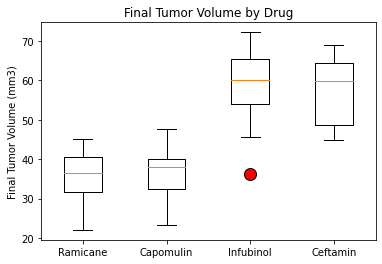

In [38]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume by Drug")
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xticklabels(drug_labels)
flierprops = dict(marker='o', markerfacecolor='red', markersize=12,
                  linestyle='none', markeredgecolor='black')
ax1.boxplot(combined_tumor_list, flierprops=flierprops)
plt.show()

## Line and Scatter Plots

In [56]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
upd_capo_combined

mouse_128 = upd_capo_combined.loc[upd_capo_combined['Mouse ID'] == 'b128']

capo_y = mouse_128['Tumor Volume (mm3)']

capo_x = mouse_128['Timepoint']
capo_y

300    45.000000
301    45.651331
302    43.270852
303    43.784893
304    42.731552
305    43.262145
306    40.605335
307    37.967644
308    38.379726
309    38.982878
Name: Tumor Volume (mm3), dtype: float64

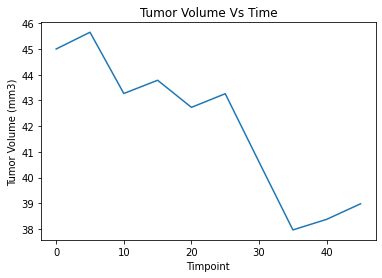

In [119]:
plt.plot(capo_x, capo_y)
plt.xlabel('Timpoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume Vs Time')
plt.show()

In [95]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_data = combined_data.loc[combined_data['Drug Regimen'] == 'Capomulin']
capo_data

capo_data_groupby = capo_data.groupby(['Mouse ID'])
average_tumolist = capo_data_groupby.mean()

tumor_y = average_tumolist['Tumor Volume (mm3)']

weight_x = average_tumolist['Weight (g)']

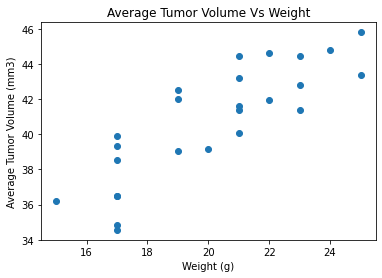

In [118]:
plt.scatter(weight_x, tumor_y)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume Vs Weight')
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
